The time evolution of the vorticity ω(x, y, t) and streamfunction ψ(x, y, t) are given by the governing equations: \\
$$ω_t +[ψ,ω]=ν∇^2ω$$
where $$[ψ, ω] = ψ_xω_y − ψ_yω_x, ∇^2 = ∂_x^2 + ∂_y^2$$ and the streamfunction satisfies \\
$$∇^2ψ = ω$$

Boundary Conditions: Assume periodic boundary conditions for both vorticity and streamfunction. \\

(a) Using the spdiags command, generate the three matrices $A = ∂_x^2 + ∂_y^2, B = ∂_x$ and $C = ∂_y$ which take these derivatives in two dimensions.


ANSWERS: With x, y ∈ [−10, 10], n = 8, write out the matrix solutions of your numerical evolution as A1, A2 and A3 for A, B and C respectively.


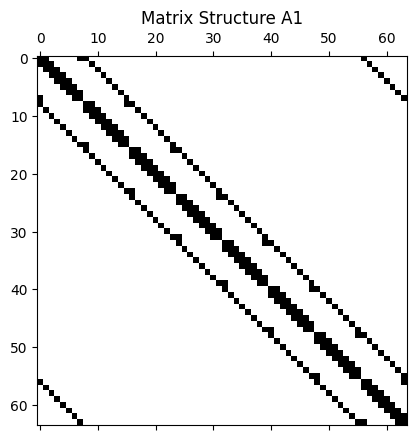

[[-0.64  0.16  0.   ...  0.    0.    0.  ]
 [ 0.16 -0.64  0.16 ...  0.    0.    0.  ]
 [ 0.    0.16 -0.64 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.64  0.16  0.  ]
 [ 0.    0.    0.   ...  0.16 -0.64  0.16]
 [ 0.    0.    0.   ...  0.    0.16 -0.64]]


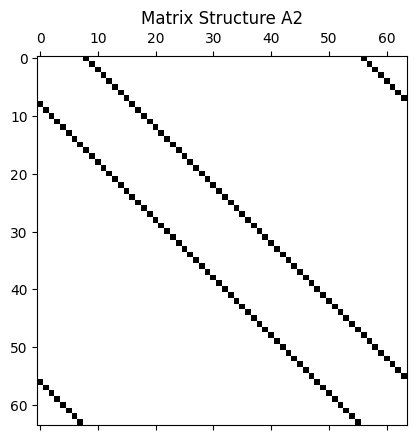

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


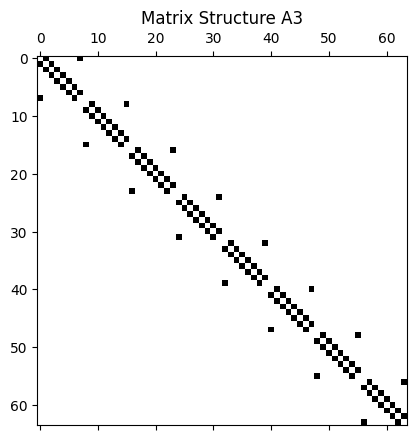

[[ 0.   0.2  0.  ...  0.   0.   0. ]
 [-0.2  0.   0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.2  0. ]
 [ 0.   0.   0.  ... -0.2  0.   0.2]
 [ 0.   0.   0.  ...  0.  -0.2  0. ]]


In [ ]:
#Matrix A
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

m = 8    # N value in x and y directions
n = m * m  # total size of matrix

h = 20/8 #step size

e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0
    e4[m*j-1] = 1

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals_A = [e1.flatten()/h**2, e1.flatten()/h**2, e5.flatten() / h**2,
             e2.flatten() / h**2, -4 * e1.flatten() / h**2, e3.flatten() / h**2,
             e4.flatten() / h**2, e1.flatten() / h**2, e1.flatten() / h**2]

offsets_A = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

A1 = spdiags(diagonals_A, offsets_A, n, n).toarray()

diagonals_B = [e1.flatten()/(2*h), -e1.flatten()/(2*h), e1.flatten() / (2*h), -e1.flatten() /(2*h)]

offsets_B = [-(n-m), -m, m, (n-m)]

diagonals_C = [e5.flatten() / (2*h), -e2.flatten() / (2*h), e3.flatten() / (2*h), -e4.flatten() / (2*h)]

offsets_C = [-m+1, -1, 1, m-1]

A1 = spdiags(diagonals_A, offsets_A, n, n).toarray()
A2 = spdiags(diagonals_B, offsets_B, n, n).toarray()
A3 = spdiags(diagonals_C, offsets_C, n, n).toarray()

# Plot matrix structure
plt.figure()
plt.spy(A1)
plt.title('Matrix Structure A1')
plt.show()

print(A1)

# Plot matrix structure
plt.figure()
plt.spy(A2)
plt.title('Matrix Structure A2')
plt.show()

print(A2)

#Plot matrix structure
plt.figure()
plt.spy(A3)
plt.title('Matrix Structure A3')
plt.show()

print(A3)